In [ ]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Import Libraries
import numpy as np 
import pandas as pd 
import string 
import spacy 

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load data sets
tweets = pd.read_csv("D:\\Data Science Assignments\\Text Mining\\Elon_musk.csv",encoding='Latin-1')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:
tweets.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [ ]:
# rename the text column
tweets = tweets.rename({'Text': 'text'}, axis=1)

In [ ]:
tweets.head()

,text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


# Text Preprocessing

In [ ]:
import re #regular expression
import string
# Remove Punctuation

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [ ]:
tweets['text'] = tweets.text.apply(clean)
tweets.text

0                                            im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: text, Length: 1999, dtype: object

In [ ]:
tweets = [text.strip() for text in tweets.text] # remove both the leading and the trailing characters
tweets = [text for text in tweets if text] # removes empty strings, because they are considered in Python as False
tweets

['i\x92m an alien',
 'idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 'joerogan spotify great interview',
 'doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more',
 'happy new year of the ox',
 'frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm',
 'owensparks flcnhvy  haha thanks',
 'flcnhvy  indeed tweets definitely do not represent realworld time allocation',
 'the most entertaining outcome is the most likely',
 'givedirectly just sent some',
 'just agree to do clubhouse with kanyewest',
 'geoffkeighley unrealengine it\x92s getting real',
 'bought some dogecoin for lil x so he can be a toddler hodler',
 'joshmanmode he definitely has issues but the sentencing seems a bit high',
 'freewalletorg thanks for fixing',
 'freewalletorg please unlock my account',
 'astrojordy',
 'this is true power haha',
 'freewalletorg any crypto wallet that won

In [ ]:
# Joining the list into one string/text
tweets_text = ' '.join(tweets)
len(tweets_text)

130001

In [ ]:
print(tweets_text[0:500])

im an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge
all thought he would fail
himself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome 


In [ ]:
# Tokenization
from nltk.tokenize import word_tokenize
tweets_tokens = word_tokenize(tweets_text)
print(tweets_tokens[0:500])

['i\x92m', 'an', 'alien', 'idaacarmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'givedirectly', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can',

In [ ]:
len(tweets_tokens)

19609

In [ ]:
import nltk  
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in tweets_tokens if not word in my_stop_words]
print(no_stop_tokens[0:100])

['i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'freewalletorg', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'keys', '

In [ ]:
len(no_stop_tokens)

13414

In [ ]:
# Noramalize the data
lower_words = [text.lower() for text in no_stop_tokens]
print(lower_words[0:50])

['i\x92m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely']


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm")

In [ ]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(lower_words))
print(doc[0:1000])

im alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest geoffkeighley unrealengine its getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet wont give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly difficult t

In [ ]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:1000])

['i\x92m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'joerogan', 'spotify', 'great', 'interview', 'doge', 'underestimate', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvy', 'haha', 'thank', 'flcnhvy', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'send', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it\x92s', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'true', 'power', 'haha', 'freewalletorg', 'crypto', 'wallet', 'won\x92t', 'give', 'private', 'key', 'avoid', 'cost', 'freew

 **Feature Extaction**

- Using CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [ ]:
print(cv.get_feature_names()[100:500])

['aliafshari', 'alien', 'aliens', 'align', 'all', 'allocati', 'allocation', 'allow', 'alloy', 'almost', 'aloha', 'alone', 'along', 'aloysiusfekete', 'alpha', 'already', 'also', 'altho', 'although', 'altit', 'altitude', 'alto', 'aluminum', 'alvianchoiri', 'always', 'am', 'amaze', 'amazing', 'amazon', 'america', 'american', 'amoghbhushan', 'amount', 'amp', 'amplification', 'amplitude', 'amyceskridge', 'analog', 'analysis', 'anandmahindra', 'anasisii', 'anbuteau', 'ancient', 'and', 'andrej', 'andrewbogut', 'andyjstanton', 'angle', 'ankitxupta', 'annerajb', 'annihila', 'announce', 'annoying', 'anode', 'another', 'answer', 'antenna', 'antibody', 'antonioetayo', 'antonkanerva', 'anvithvittal', 'anybody', 'anyone', 'anything', 'anytime', 'anyway', 'anywhere', 'aoc', 'aok', 'apart', 'apogee', 'apologist', 'apompliano', 'app', 'appeal', 'appear', 'apple', 'apply', 'appreciate', 'appreciated', 'approach', 'approval', 'approve', 'approximate', 'approximately', 'approximation', 'april', 'aquatic',

In [ ]:
print(tweetscv.toarray()[100:500])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(tweetscv.toarray().shape)

(13419, 3956)


- CountVectorizer with N-grams (Bigrams & Trigrams)

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [ ]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'big', 'booster', 'car', 'cleantechnica', 'come', 'cool', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'even', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'fsd', 'future', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'look', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'neuralink', 'new', 'next', 'one', 'people', 'point', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rocket', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'thank', 'that', 'thesheetztweetz', 'think', 'time', 'tobyliiiiiiiiii', 'true', 'use', 'way', 'we', 'we re', 'week', 'well', 'wholemarsblog', 'work', 'would', 'yeah', 'yea

- TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [ ]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matix_ngram.toarray())

['able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'ago', 'agree', 'ai', 'aim', 'air', 'ajtourville', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'another', 'appear', 'apply', 'appreciate', 'archillect', 'around', 'article', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'become', 'benmezrich', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'bs', 'build', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cell', 'chance', 'change', 'china', 'civilization', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'critical', 'curevac', 'cyberpunk', 'cyberpunkgame', 'cybertruck', 'day', 'deep', 'definitely', 'delivery', 'design', 'detail', 'didn', 'difference', 'different', 'djsnm', 'dmcry

In [ ]:
clean_tweets=' '.join(lemmas)
clean_tweets

'i\x92m alien idaacarmack ray trace cyberpunk hdr nextlevel try joerogan spotify great interview doge underestimate teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owenspark flcnhvy haha thank flcnhvy indeed tweet definitely represent realworld time allocation entertaining outcome likely givedirectly send agree clubhouse kanyewest geoffkeighley unrealengine it\x92s get real buy dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet won\x92t give private key avoid cost freewalletorg app suck rt spacex nasa select falcon heavy launch first two element lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly difficult technical amp econom

**Generate word cloud**

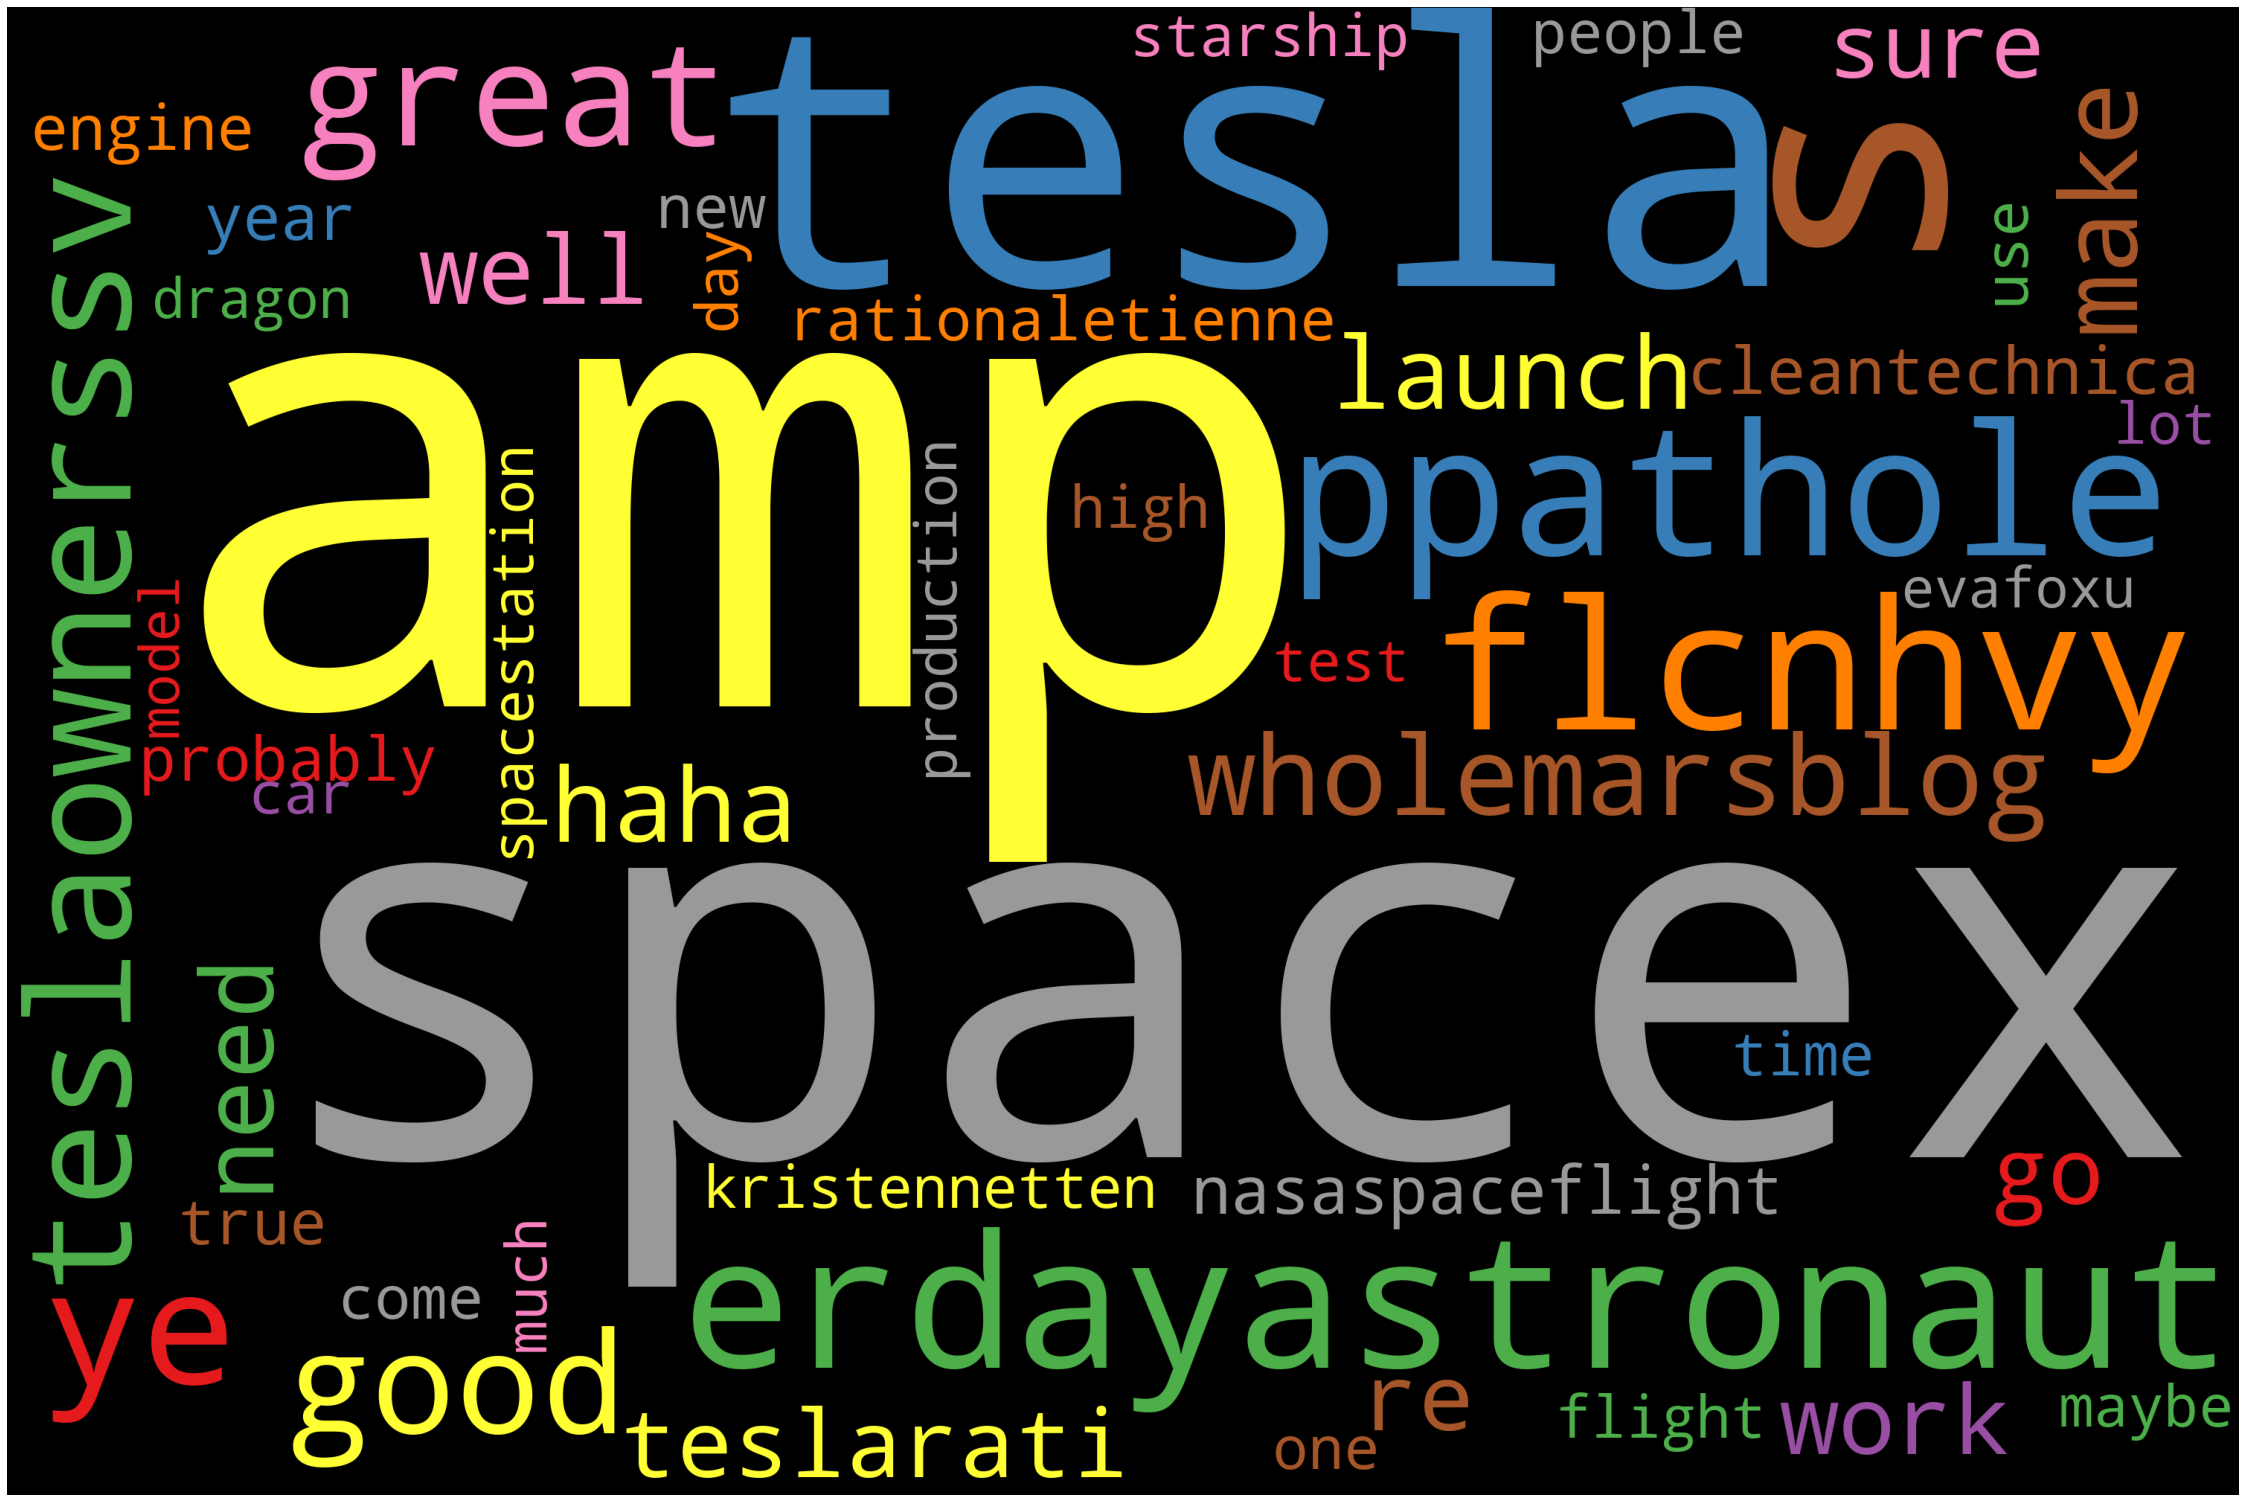

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

from wordcloud import WordCloud, STOPWORDS

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

**Named entity recognition** 




---



In [ ]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_block = clean_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [ ]:
for token in doc_block[500:600]:
    print(token, token.pos_)

tough ADJ
one NUM
rt PROPN
spacex VERB
watch VERB
falcon NOUN
launch NOUN
starlink NOUN
satellite NOUN
httpstcobjfjlczwdk NOUN
twitter PROPN
fill VERB
graffiti PROPN
art PROPN
eiraum PROPN
giga PROPN
berlin PROPN
progress PROPN
hamoon PROPN
neuralink PROPN
neuralink PROPN
work VERB
super ADV
hard ADV
ensure VERB
implant ADJ
safety NOUN
amp NOUN
close ADJ
communication NOUN
rt PROPN
spacex ADJ
mission NOUN
enable ADJ
access NOUN
everyday ADP
people NOUN
dream NOUN
go VERB
space NOUN
rt PROPN
spacex VERB
announce VERB
first ADJ
commercial ADJ
astronaut NOUN
mission NOUN
orbit PROPN
earth PROPN
aboard ADP
dragon PROPN
httpstcombesvnakad PROPN
httpstcouklsjffrjk PROPN
youve NOUN
work VERB
advanced VERB
wearable ADJ
phone NOUN
robot NOUN
skill NOUN
need VERB
neuralink NOUN
feel VERB
weird ADJ
help NOUN
make VERB
hopefully ADV
good ADJ
version NOUN
cyberpunk NOUN
come VERB
true ADJ
please INTJ
consider VERB
work NOUN
neuralink NOUN
shortterm NOUN
solve VERB
brainspine VERB
injury NOUN
longt

In [ ]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[500:600])

['levine', 'catchy', 'sat', 'launch', 'year', 'laser', 'satellite', 'ground', 'station', 'need', 'poles', 'version', 'confusion', 'say', 'fsd', 'version', 'number', 'rest', 'car', 'ai', 'hardware', 'amp', 'software', 'waymo', 'money', 'loop', 'happen', 'allow', 'tunnel', 'yesterday', 'boy', 'spacex', 'offer', 'provide', 'increase', 'access', 'space', 'satellite', 'operator', 'seek', 'spacex', 'falcon', '\x92s', 'stage', 'land', 'course', 'love', 'droneship', 'spacex', 'codewisdom', 'teslascope', 'we\x92re', 'switch', 'fsd', 'version', 'numbering', 'distinguish', 'update', 'nasaspaceflight', 'week', 'spacex', 'weather', 'stand', 'today', 'launch', 'team', 'continue', 'give', 'company', 'depend', 'mission', 'get', 'scru', 'launch', 'satellite', 'range', 'customer', 'tomorrow', 'offer', 'lowcost', 'access', 'gerberkawasaki', 'part', 'solution', 'require', 'lot', 'water', 'amp', 'land', 'need', 'spacex', 'path', 'rocket', 'energy', 'solve', 'part', 'problem', 'chain', 'hyd', 'detail']


In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,spacex,180
1,amp,149
2,make,64
3,launch,62
4,year,48
5,work,46
6,go,46
7,need,40
8,get,39
9,come,39


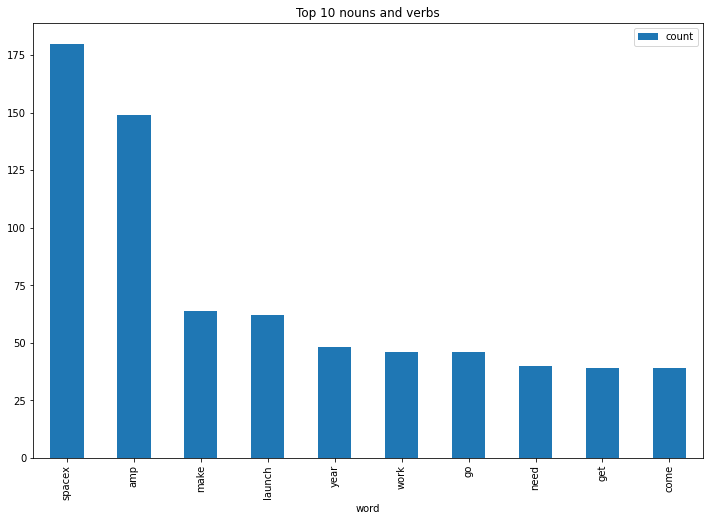

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

**que 2 emotion mining **

In [ ]:
tweets = pd.read_csv('D:\\Data Science Assignments\\Text Mining\\Elon_musk.csv',encoding='Latin-1')

In [ ]:
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
tweets.drop(['Unnamed: 0'],inplace=True,axis=1)

In [ ]:
tweets

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
tweets = tweets.rename({'Text': 'text'}, axis=1)

In [ ]:
tweets

,text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [ ]:
import re #regular expression
import string
# Remove Punctuation

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [ ]:
tweets['text'] = tweets.text.apply(clean)

In [ ]:
tweets = [text.strip() for text in tweets.text] 
tweets = [text for text in tweets if text] 
tweets

['i\x92m an alien',
 'idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 'joerogan spotify great interview',
 'doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more',
 'happy new year of the ox',
 'frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm',
 'owensparks flcnhvy  haha thanks',
 'flcnhvy  indeed tweets definitely do not represent realworld time allocation',
 'the most entertaining outcome is the most likely',
 'givedirectly just sent some',
 'just agree to do clubhouse with kanyewest',
 'geoffkeighley unrealengine it\x92s getting real',
 'bought some dogecoin for lil x so he can be a toddler hodler',
 'joshmanmode he definitely has issues but the sentencing seems a bit high',
 'freewalletorg thanks for fixing',
 'freewalletorg please unlock my account',
 'astrojordy',
 'this is true power haha',
 'freewalletorg any crypto wallet that won

In [ ]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(tweets))
sentences

['i\x92m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest geoffkeighley unrealengine it\x92s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy this is true power haha freewalletorg any crypto wallet that won\x92t give you your private keys should be avoided at all costs freewalletor

In [ ]:
sent_df = pd.DataFrame(tweets,columns=['sentence'])
sent_df

,sentence
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1969,flcnhvy true it sounds so surreal but the nega...
1970,ppathole make sure to read ur terms amp condit...
1971,teslagong ppathole samwise gamgee
1972,ppathole altho dumb and dumber is


In [ ]:
import pandas as pd
affin = pd.read_csv("D:\\Data Science\\Excel Files\\Afinn.csv", encoding='latin1')

In [ ]:
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\knive\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
doc = nlp(' '.join(lower_words))
print(doc[0:1000])

im alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify great interview doge underestimated teslacn congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks flcnhvy haha thanks flcnhvy indeed tweets definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest geoffkeighley unrealengine its getting real bought dogecoin lil x toddler hodler joshmanmode definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy true power haha freewalletorg crypto wallet wont give private keys avoided costs freewalletorg app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville yes rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly difficult t

In [ ]:
# manual testing
calculate_sentiment(text='great')

3

In [ ]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       0
1       0
2       3
3      -1
4       6
       ..
1969   -3
1970    1
1971    0
1972   -3
1973    2
Name: sentiment_value, Length: 1974, dtype: int64

In [ ]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value
182,naval also the road to hell is mostly paved w...,-7
1259,tjlk there are some eerie parallels between th...,-6
1695,neuroskeptic they dont fire all at once some ...,-6
1514,ppathole the early investor part of tesla is...,-5
41,univercurious extremely misleading image as do...,-5
...,...,...
462,picotjohn cyberpunkgame its a good to great g...,10
452,teslaownerssv it will get absurdly good tesla ...,10
1158,thanks tesla team for great work on deliveries...,10
1289,one way or another excitement guaranteed suppo...,11


In [ ]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1974.000000
mean        0.739108
std         1.824627
min        -7.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: sentiment_value, dtype: float64

In [ ]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value
0,im an alien,0
1,idaacarmack ray tracing on cyberpunk with hdr ...,0
3,doge is underestimated,-1
6,frodo was the underdoge\nall thought he would ...,-2
8,flcnhvy indeed tweets definitely do not repre...,0
...,...,...
1967,ai symbiosis while u wait,0
1968,flcnhvy theres some of that too,0
1969,flcnhvy true it sounds so surreal but the nega...,-3
1971,teslagong ppathole samwise gamgee,0


In [ ]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value
2,joerogan spotify great interview,3
4,teslacn congratulations tesla china for amazin...,6
5,happy new year of the ox,3
7,owensparks flcnhvy haha thanks,5
9,the most entertaining outcome is the most likely,2
...,...,...
1962,ppathole ihearttesla for sure this is both gre...,3
1963,redmercy yes,1
1964,buzzindelhi sorry should hopefully be soon,1
1970,ppathole make sure to read ur terms amp condit...,1


In [ ]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,index
0,im an alien,0,0
1,idaacarmack ray tracing on cyberpunk with hdr ...,0,1
2,joerogan spotify great interview,3,2
3,doge is underestimated,-1,3
4,teslacn congratulations tesla china for amazin...,6,4
...,...,...,...
1969,flcnhvy true it sounds so surreal but the nega...,-3,1969
1970,ppathole make sure to read ur terms amp condit...,1,1970
1971,teslagong ppathole samwise gamgee,0,1971
1972,ppathole altho dumb and dumber is,-3,1972


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

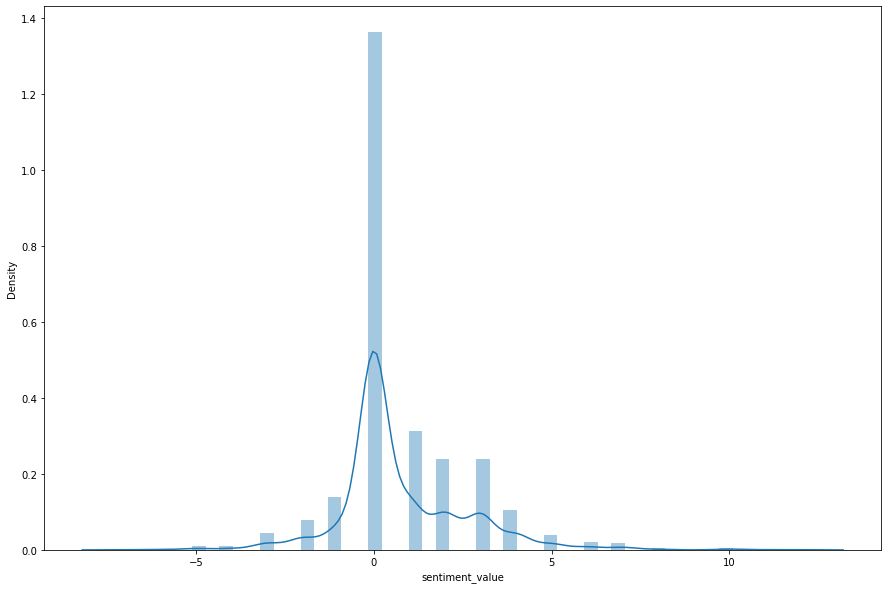

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

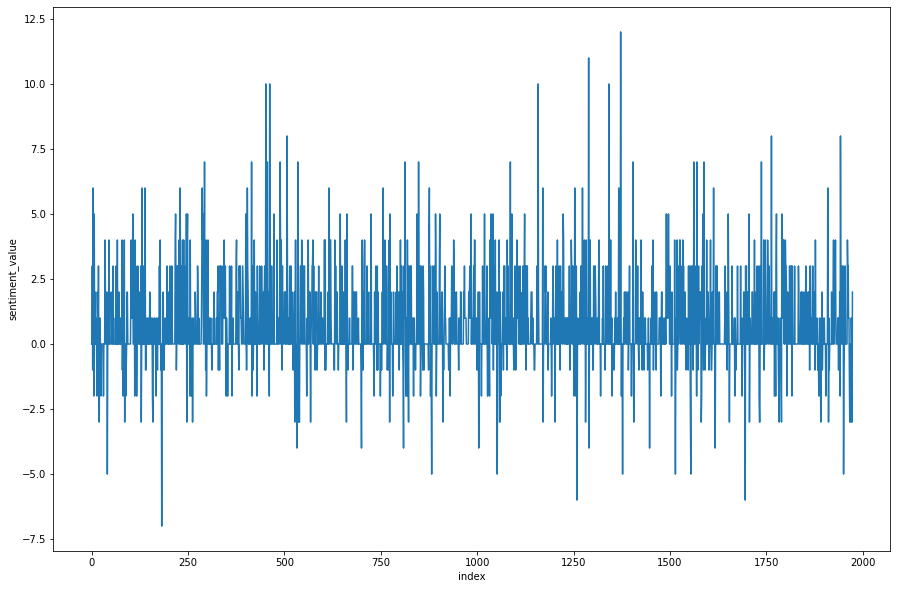

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

**Amazon **

In [ ]:
!pip install selenium

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [ ]:
macbook_air=[]

In [ ]:
for i in range (1,41):
    mac=[]
    url="https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviewsshowViewpoints=1&pageNumber="+str(i)
    response=requests.get(url)
    soup=bs(response.content,"html.parser")
    reviews=soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
    for i in range (len(reviews)):
        mac.append(reviews[i].text)
    macbook_air=macbook_air+mac 

In [ ]:
macbook_air

["\nIt's awesome.\n",
 '\nThanks to Amazon for quick and safe delivery 🙏This is my first MacBook from apple, the screen quality is good as I expectedThe sound quality is amazing, with a  real Dolby and surround sound from the speakers. 👌The trackpad is quite interesting, I have never seen a such trackpad on any other laptop, 👍Overall it is good to buy, go for it without hesitation.👍\n',
 '\nGood quality\n',
 '\nLove the laptop. Excellent overall features.\n',
 '\nBest laptop till date and unbeatable desgin and specs in today moder world as well . Anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs.  Loved the ui and user experience of apple product especially macbook is totally different from any other product\n',
 '\nThis laptop is not having SMC options as we have in Intel- Macbook.\n',
 '\nThere is no dislike in apple product\n',
 "\nIt's a very laptop 💻 but here 

In [ ]:
len(macbook_air)

300

In [ ]:
rev={"review":macbook_air}

In [ ]:
review_data=pd.DataFrame.from_dict(rev)
pd.set_option('max_colwidth',800)

In [ ]:
review_data

,review
0,\nIt's awesome.\n
1,"\nThanks to Amazon for quick and safe delivery 🙏This is my first MacBook from apple, the screen quality is good as I expectedThe sound quality is amazing, with a real Dolby and surround sound from the speakers. 👌The trackpad is quite interesting, I have never seen a such trackpad on any other laptop, 👍Overall it is good to buy, go for it without hesitation.👍\n"
2,\nGood quality\n
3,\nLove the laptop. Excellent overall features.\n
4,\nBest laptop till date and unbeatable desgin and specs in today moder world as well . Anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs. Loved the ui and user experience of apple product especially macbook is totally different from any other product\n
...,...
295,
296,"\nNo complaints, looks more compact than 2017 model.\n"
297,\nBest product everAmazon imported and directly delivered to me\n
298,\nGood product ... Must buy. Camera is good .. screen is good. Smooth running laptop. Best for gaming also .\n


In [ ]:
text=" ".join(review_data)

In [ ]:
def clean_text(text):
    text=re.sub('@[A-Za-z0-9]+','',str(text))#To remove @
    text=re.sub('#','',str(text))#To remove #
    text=re.sub('RT[\s]+','',str(text))#To remove retweets
    text=re.sub('\n\n','',str(text))  #To remove \n
    text=text.lower()
    text=re.sub('https?:\/\/\S+','',str(text)) #To remove links
    
    return text
review_data["review"]=review_data["review"].apply(clean_text)

In [ ]:
review_data

,review
0,\nit's awesome.\n
1,"\nthanks to amazon for quick and safe delivery 🙏this is my first macbook from apple, the screen quality is good as i expectedthe sound quality is amazing, with a real dolby and surround sound from the speakers. 👌the trackpad is quite interesting, i have never seen a such trackpad on any other laptop, 👍overall it is good to buy, go for it without hesitation.👍\n"
2,\ngood quality\n
3,\nlove the laptop. excellent overall features.\n
4,\nbest laptop till date and unbeatable desgin and specs in today moder world as well . anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs. loved the ui and user experience of apple product especially macbook is totally different from any other product\n
...,...
295,
296,"\nno complaints, looks more compact than 2017 model.\n"
297,\nbest product everamazon imported and directly delivered to me\n
298,\ngood product ... must buy. camera is good .. screen is good. smooth running laptop. best for gaming also .\n


In [ ]:
text=" ".join(review_data["review"])

In [ ]:
text

'\nit\'s awesome.\n \nthanks to amazon for quick and safe delivery 🙏this is my first macbook from apple, the screen quality is good as i expectedthe sound quality is amazing, with a  real dolby and surround sound from the speakers. 👌the trackpad is quite interesting, i have never seen a such trackpad on any other laptop, 👍overall it is good to buy, go for it without hesitation.👍\n \ngood quality\n \nlove the laptop. excellent overall features.\n \nbest laptop till date and unbeatable desgin and specs in today moder world as well . anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs.  loved the ui and user experience of apple product especially macbook is totally different from any other product\n \nthis laptop is not having smc options as we have in intel- macbook.\n \nthere is no dislike in apple product\n \nit\'s a very laptop 💻 but here are some of my observations

In [ ]:
text_tokens = word_tokenize(text)

In [ ]:
text_tokens

['it',
 "'s",
 'awesome',
 '.',
 'thanks',
 'to',
 'amazon',
 'for',
 'quick',
 'and',
 'safe',
 'delivery',
 '🙏this',
 'is',
 'my',
 'first',
 'macbook',
 'from',
 'apple',
 ',',
 'the',
 'screen',
 'quality',
 'is',
 'good',
 'as',
 'i',
 'expectedthe',
 'sound',
 'quality',
 'is',
 'amazing',
 ',',
 'with',
 'a',
 'real',
 'dolby',
 'and',
 'surround',
 'sound',
 'from',
 'the',
 'speakers',
 '.',
 '👌the',
 'trackpad',
 'is',
 'quite',
 'interesting',
 ',',
 'i',
 'have',
 'never',
 'seen',
 'a',
 'such',
 'trackpad',
 'on',
 'any',
 'other',
 'laptop',
 ',',
 '👍overall',
 'it',
 'is',
 'good',
 'to',
 'buy',
 ',',
 'go',
 'for',
 'it',
 'without',
 'hesitation.👍',
 'good',
 'quality',
 'love',
 'the',
 'laptop',
 '.',
 'excellent',
 'overall',
 'features',
 '.',
 'best',
 'laptop',
 'till',
 'date',
 'and',
 'unbeatable',
 'desgin',
 'and',
 'specs',
 'in',
 'today',
 'moder',
 'world',
 'as',
 'well',
 '.',
 'anywhere',
 'you',
 'can',
 'see',
 'its',
 'the',
 'best',
 'and',
 'no

In [ ]:
text_without_sw=[word for word in text_tokens if not word in stopwords.words()]

In [ ]:
tf=TfidfVectorizer()

In [ ]:
text_tf=tf.fit_transform(text_without_sw)

In [ ]:
feature_names=tf.get_feature_names()
dense=text_tf.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [ ]:
df

,000,10,100,10finally,10get,10i,10light,10th,10watch,11,...,x86,year,years,yesterday,yet,you,youtube,yrs,yu,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
words_list=" ".join(df)

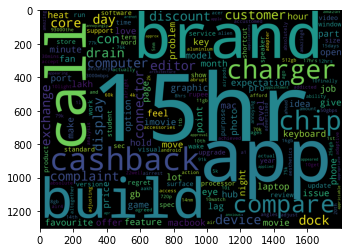

In [ ]:
wordcloud=WordCloud(background_color="black",width=1800,height=1300).generate(words_list)
plt.imshow(wordcloud)

In [ ]:
with open ("D:\\Data Science Assignments\\Text Mining\positive-words.txt","r") as pw:
    positive_words=pw.read().split("/n")
    
positive_words=positive_words[35:]

In [ ]:
with open ("D:\\Data Science Assignments\\Text Mining\\negative-words.txt","r") as nw:
    negative_words=nw.read().split("/n")
    
negative_words=negative_words[35:] 

In [ ]:
neg_text=" ".join([word for word in df if not word in negative_words])

In [ ]:
pos_text=" ".join([word for word in df if not word  in positive_words])

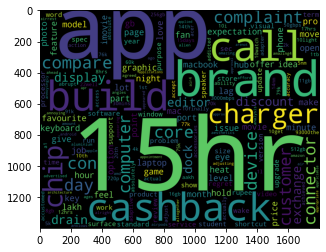

In [ ]:
pos_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(pos_text)
plt.imshow(pos_wordcloud)

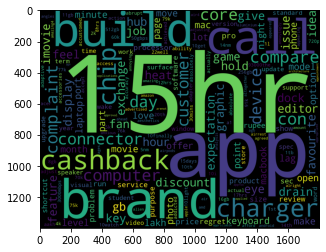

In [ ]:
neg_wordcloud=WordCloud(background_color="black",width=1800,height=1400).generate(neg_text)
plt.imshow(neg_wordcloud)

In [ ]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["review"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

review_data[["subjectivity", "polarity"]] = review_data.apply(sentiment_analysis, axis=1)
review_data

,review,subjectivity,polarity
0,\nit's awesome.\n,1.000000,1.000000
1,"\nthanks to amazon for quick and safe delivery 🙏this is my first macbook from apple, the screen quality is good as i expectedthe sound quality is amazing, with a real dolby and surround sound from the speakers. 👌the trackpad is quite interesting, i have never seen a such trackpad on any other laptop, 👍overall it is good to buy, go for it without hesitation.👍\n",0.469872,0.358333
2,\ngood quality\n,0.600000,0.700000
3,\nlove the laptop. excellent overall features.\n,0.533333,0.500000
4,\nbest laptop till date and unbeatable desgin and specs in today moder world as well . anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs. loved the ui and user experience of apple product especially macbook is totally different from any other product\n,0.575000,0.417857
...,...,...,...
295,,0.000000,0.000000
296,"\nno complaints, looks more compact than 2017 model.\n",0.500000,0.500000
297,\nbest product everamazon imported and directly delivered to me\n,0.350000,0.550000
298,\ngood product ... must buy. camera is good .. screen is good. smooth running laptop. best for gaming also .\n,0.520000,0.700000


In [ ]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
review_data["analysis"] = review_data["polarity"].apply(analysis)
review_data

,review,subjectivity,polarity,analysis
0,\nit's awesome.\n,1.000000,1.000000,Positive
1,"\nthanks to amazon for quick and safe delivery 🙏this is my first macbook from apple, the screen quality is good as i expectedthe sound quality is amazing, with a real dolby and surround sound from the speakers. 👌the trackpad is quite interesting, i have never seen a such trackpad on any other laptop, 👍overall it is good to buy, go for it without hesitation.👍\n",0.469872,0.358333,Positive
2,\ngood quality\n,0.600000,0.700000,Positive
3,\nlove the laptop. excellent overall features.\n,0.533333,0.500000,Positive
4,\nbest laptop till date and unbeatable desgin and specs in today moder world as well . anywhere you can see its the best and no.1 choice laptop still and yes it desrves it as the name says macbook is macbook .. apple products does true to their desgin n specs. loved the ui and user experience of apple product especially macbook is totally different from any other product\n,0.575000,0.417857,Positive
...,...,...,...,...
295,,0.000000,0.000000,Neutral
296,"\nno complaints, looks more compact than 2017 model.\n",0.500000,0.500000,Positive
297,\nbest product everamazon imported and directly delivered to me\n,0.350000,0.550000,Positive
298,\ngood product ... must buy. camera is good .. screen is good. smooth running laptop. best for gaming also .\n,0.520000,0.700000,Positive


In [ ]:
review_data['analysis'].value_counts()

Positive    243
Neutral      38
Negative     19
Name: analysis, dtype: int64

In [ ]:
#positive comments
((228+33)/280)*100

93.21428571428572

In [ ]:
#negative comments
(19/199)*100

9.547738693467336

- So in the above data only 9.54% is negative comments
- So the Macbook air product received good reviews from users